# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 5pm, Friday 12th April 2019</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this programming task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. At the end, you must run the entire notebook and submit two files:
 1. The source of your solution notebook: [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output: [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

In [1]:
"""
Import packages needed for processing
"""
import numpy as np   # import the numpy package
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime      # this package is for handling time

"""
If you need add any additional packages, then add them below this line
"""
import os
import re
import operator
%matplotlib inline

**Note**: you must place your data file in the same folder with your python notebook.

In [2]:
# Declare the path to the data file
DATA_FILE = "medicare-office-locations.csv"

**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [3]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['Open', 'SITE NAME', 'Closed for lunch', 'OFFICE TYPE', 'No.', 'SUBURB', 'POSTCODE', 'LATITUDE', 'Close', 'STATE', 'ADDRESS', 'LONGITUDE'])


---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['SUBURB']
    * data_dict['STATE']
    
2. Write your code to print out the number of data records. (**1 mark**)

[**Total mark: 5**]

In [4]:
# INSERT YOUR CODE HERE
'''
1. Write you code to print the type for the following variables:
    * input_file
    * data_dict
    * data_dict['SUBURB']
    * data_dict['STATE']
'''

print(type(input_file))
print(type(data_dict))
print(type(data_dict['SUBURB']),data_dict['SUBURB'].dtype)
print(type(data_dict['STATE']),data_dict['STATE'].dtype)



<class 'csv.DictReader'>
<class 'dict'>
<class 'numpy.ndarray'> <U16
<class 'numpy.ndarray'> <U3


In [5]:
# INSERT YOUR CODE HERE
'''
2. Write your code to print out the number of data records
'''
print(np.size(data_dict['No.']))

239


---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data. 

**Your task:**
1. Write your code to find and print the minimum and the maximum values in the **LATITUDE** column. (**1 mark**)
2. Write your code to find and print the minimum and maximum values of the **LONGITUDE** column. (**1 marks**)
3. Write your code to find and print the central point of all the locations. This point is a pair of the average of latitudes *(the **LATITUDE** column)* and the average of longitudes *(the **LONGITUDE** column)*. (**3 marks**)

**[Total mark: 5]**

In [6]:
# INSERT YOUR CODE HERE
"""
1. Write your code to find and print the minimum and the maximum values in the **LATITUDE** column.
"""

print("Min=",np.min(data_dict['LATITUDE']),"\t","Max=",np.max(data_dict['LATITUDE']))


Min= -42.97638 	 Max= -12.37187


In [7]:
# INSERT YOUR CODE HERE
"""
2. Write your code to find and print the minimum and maximum values of the **LONGITUDE** column.
"""
print("Min=",np.min(data_dict['LONGITUDE']),"\t","Max=",np.max(data_dict['LONGITUDE']))

Min= 114.61273 	 Max= 153.55671


In [8]:
# INSERT YOUR CODE HERE
"""
3. Write your code to find and print the central point of all the locations. 
This point is a pair of the average of latitudes *(the **LATITUDE** column)* 
    and the average of longitudes *(the **LONGITUDE** column)*
"""
print("CENTRAL POINT=",np.mean(data_dict['LATITUDE']),",",np.mean(data_dict['LONGITUDE']))

CENTRAL POINT= -32.476501799163174 , 145.58025615062763


---
## **Instruction 3**
The following code segment is designed to examine data from the **STATE** column. This column provides information about the states of medical centers.


**Your tasks**:

1. Write your code to find and print out the number of **unique** states. (**3 marks**)
2. Write your code to find and print out the list of states that appears more than **ten** times in the dataset. (**3 marks**)
3. Write your code to find and print out the state with highest frequency. Both the state name and frequency need to be printed out (**3 marks**)
4. Write your code to construct a dictionary variable: ***state_popularity*** whose keys are unique states and values are the corresponding counts computed from the dataset. Print the dictionary. (**3 marks**)
5. Plot a bar chart for ***state_popularity*** sorted in descending order of values. (**3 marks**)

[**Total mark: 15**]

In [9]:
# INSERT YOUR CODE HERE 
"""
1. Write your code to find and print out the number of **unique** states.
Hint: you might want to use np.unique
"""
print(np.size(np.unique(data_dict['STATE'])))

8


In [10]:
# INSERT YOUR CODE HERE 
"""
2. Write your code to find and print out the list of states 
    that appears more than **ten** times in the dataset.

Hint: read the documention for function numpy.unique carefully and examine what does it return.
"""
unique,counts=np.unique(data_dict['STATE'],return_counts=True)
for i,j in zip(unique,counts):
    if(j>10):
        print(i)
#print(np.unique(data_dict['STATE'],return_counts=True))

NSW
QLD
SA
VIC
WA


In [11]:
# INSERT YOUR CODE HERE 
"""
3. Write your code to find and print out the state with highest frequency. 
Both the state name and frequency need to be printed out
"""
unique,counts=np.unique(data_dict['STATE'],return_counts=True)
print(unique[np.where(counts==max(counts))][0],max(counts))

NSW 87


In [12]:
# INSERT YOUR CODE HERE 
"""
4. Write your code to construct a dictionary variable: ***state_popularity*** 
    whose keys are unique states and values are the corresponding counts computed from the dataset.
Print the dictionary.
"""
state_popularity=dict()
for i,j in zip(unique,counts):
    state_popularity[i]=j
print(state_popularity)

{'TAS': 7, 'NT': 4, 'WA': 19, 'NSW': 87, 'SA': 14, 'VIC': 54, 'ACT': 5, 'QLD': 49}


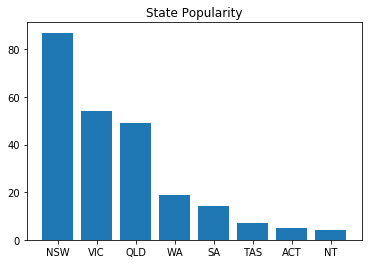

In [13]:
# INSERT YOUR CODE HERE 
'''
5. Plot a bar chart for state_popularity sorted in descending order of values.
'''

sorted_values = sorted(state_popularity.items(), key=operator.itemgetter(1), reverse=True)
x=[]
y=[]
for i in sorted_values:
    x.append(i[0])
    y.append(i[1])

plt.title("State Popularity")
plt.bar(x,y)
plt.xlabel=('Values')
plt.ylabel=('State')
plt.show()


---
## **Instruction 4**
We shall examine the opening hours of the medicare offices. The time is a string in the format: **'Hour:Minute:Second'**. If the time is not in the correct form, the opening duration of the office is **invalid**. Run the cell below:

In [14]:
# print the opening time and closing time of the first medicare office.

print(data_dict['Open'][0])
print(data_dict['Close'][0])

8:30:00
16:30:00


**Your tasks**:

1. Define a function called `compute_opening_duration` that takes two strings: the opening time and the closing time as the inputs and return the opening duration in hours. If the opening time or the closing time are not in the correct form, the function returns -1. (**7 marks**)
2. Write your code to calculate an array called **opening_duration_list** that stores the opening duration of all medicare offices. Store the array as a numpy array. Print the first 10 entries in the array. (**3 mark**)
3. Construct a new array called **valid_opening_duration_list** to store only valid opening duration entries and then print out the number of elements in the array. (**3 marks**)
4. Print the min, max, median and construct a box-plot for variable **valid_opening_duration_list**. (**5 marks**)

[**Total mark: 18**]

In [15]:
'''
1. Define a function called `compute_opening_duration` to calculate the duration of the opening time. 
The function takes two strings: the opening time and the closing time as the inputs and return the opening duration in hours.
The opening time and the closing time are in the form 'Hour:Minute:Second'.
If the opening time or the closing time are not in the correct form, the function returns -1.

Example: 
    opening time: '8:30:00', closing time: '16:00:00', return 7.5
    opening time: '9:00:00', closing time: '16:15:00', return 7.25
    opening time: '8:30:00', closing time: 'evening', return -1
    
Hint: you might want to use datetime package
'''
    
'''
    Input: two string: opening_time and closing_time
    Output: the opening duration in hours
    Return -1 if any time is in incorrect form.
'''
    # INSERT YOUR CODE HERE
def compute_opening_duration(opening_time, closing_time):
    try:
        t1=datetime.datetime.strptime(opening_time, '%H:%M:%S')
        t2=datetime.datetime.strptime(closing_time, '%H:%M:%S')
        return (t2-t1).total_seconds()/(60*60)
        
    except ValueError:
        return -1
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
    compute_opening_duration('8:30:00','EVENING')

In [16]:
# INSERT YOUR CODE HERE
"""
2. Write your code to calculate an array called **opening_duration_list** 
    that stores the opening duration of all medicare offices.
Store the array as a numpy array.
Print the first 10 entries in the array. 
"""
opening_duration_list=[]
for i,j in zip(data_dict['Open'],data_dict['Close']):
    opening_duration_list.append(compute_opening_duration(i,j))
opening_duration_numpy=np.asarray(opening_duration_list)
print(opening_duration_numpy[:10])

[8.  8.5 6.5 7.5 6.5 6.5 8.5 6.5 7.5 6.5]


In [17]:
# INSERT YOUR CODE HERE 
"""
3. Construct a new array called **valid_opening_duration_list** to store only valid opening duration entries and 
then print out the number of elements in the array.
"""
valid_opening_duration_list=[]
for i in np.nditer(opening_duration_numpy):
    if i!=-1:
        valid_opening_duration_list.append(i)
print(np.size(valid_opening_duration_list))

235


6.5
9.0
7.659574468085107


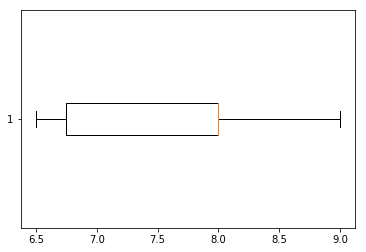

In [18]:
# INSERT YOUR CODE HERE
"""
4. Print the min, max, median and construct a box-plot for variable **valid_opening_duration_list**
"""
print(np.min(valid_opening_duration_list))
print(np.max(valid_opening_duration_list))
print(np.mean(valid_opening_duration_list))
plt.boxplot(valid_opening_duration_list, vert=False)
plt.show()

---
## **Instruction 5**
Continue from the previous steps, **your tasks are:**

1. Write your code to find and print all the invalid entry indices. An entry is invalid when its opening duration is invalid. (**5 marks**).
2. Write your code to filter out all invalid entries and store your data into a new variable **data_dict_cleaned** and print out the number of data records after being cleaned. (**5 marks**)

[**Total mark: 10**]

In [19]:
# INSERT YOUR CODE HERE
"""
1. Write your code to find and print all the invalid entry indices.
 You might want to use np.where function.
"""

print(np.where(opening_duration_numpy==-1)[0])

[ 15  35 127 220]


In [20]:
# INSERT YOUR CODE HERE
"""
2. Write your code to filter out all invalid entries 
and store your data into a new variable data_dict_cleaned
and print out the number of data records after being cleaned.
"""
data_dict_cleaned = {}
for i,j in zip(data_dict.keys(),data_dict.values()):
    k=np.delete(j,np.where(opening_duration_numpy==-1))
    data_dict_cleaned[i]=k
print(np.size(data_dict_cleaned['No.']))

235


---
## **Instruction 6**
The following code segment is designed to examine data from **ADDRESS** column.

We say that an address is **valid** if it contains the number and the name of the street, which are separated by spaces. The formats for a valid street name is **"stNumber stName"** or **"stNumber1-stNumber2 stName"**, where **stNumber**, **stNumber1** and **stNumber2** are positive numbers and **stName** is any non-empty string. For example, **20 St Kilda Road** and **100-104 Elliott Avenue** are valid addresses while **St Kilda Road** and **0 Elliott Avenue** are invalid addresses.

**Your tasks**:

1. Define a function called `valid_address` that takes a string `address` and returns `True` if `address` is valid and `False` otherwise. (**7 marks**)
2. Write your code to **further** filter out all entries with invalid addresses, and store your cleaned data into the new variable named ***data_dict_cleaned2*** and print out the number of data records after being cleaned. (**5 marks**)

**Note:** 
1. All street numbers if exist in an address are integers. There is at most a hyphen in an address to connect two street numbers.
2. In reality, an address can be "Shop 3, 10 St Kilda Road". However, for simplicity, we only consider the valid address contains street numbers and a street name.

[**Total mark: 12**]

In [21]:
# INSERT YOUR CODE HERE
'''
1. Define a function called valid_address that takes a string address and
returns True if address is valid and False otherwise.
'''
def valid_address(address):
    re_pattern=re.compile('^([1-9]\d*|[1-9]\d*-[1-9]\d*)\s[A-Za-z\s\D]+')
    str2=re_pattern.match(address)
    if str2:
        str2=re_pattern.match(address).group(0)
        if(len(address)==len(str2)):
             return True
        else:
             return False
    else:
        return False
# k=re.findall(r'^[1-9]\d*-[1-9]\d*\s[A-Za-z].\D*',data_dict_cleaned['ADDRESS'][0]+'1')
# k1=re.findall(r'^(?:[1-9]\d*|[1-9]\d*-[1-9]\d*)\s[A-Za-z\s]+',data_dict_cleaned['ADDRESS'][0]+'1')
# print(valid_address("St Kilda Road"))

In [22]:
# INSERT YOUR CODE HERE
"""
2. Write your code to further filter out all entries with invalid addresses, and store your cleaned data 
    into the new variable named data_dict_cleaned2 and print out the number of data records 
    after being cleaned.
"""
valid_address_list=[]
for i in np.nditer(data_dict_cleaned['ADDRESS']):
    if valid_address(str(i)):
        valid_address_list.append(i)
    else:   
        valid_address_list.append('None')

data_dict_cleaned2 = {}
for i,j in zip(data_dict_cleaned.keys(),data_dict_cleaned.values()):
    k=np.delete(j,np.where(valid_address_list==np.asarray("None")))
    data_dict_cleaned2[i]=k
print(np.size(data_dict_cleaned2["No."]))

195


In [23]:
os.system('jupyter nbconvert --to html assignment1_solution.ipynb')

0